In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import io
import pylab as plt
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
import plotly.graph_objects as go
import seaborn as sns

Mounted at /content/drive


In [ ]:
#Creates the list of years we want to examine
years_auchincruvie = list(range(2005,2020))

#Creates a list of the dataframes for each year by using a loop. Process these dataframes and add them to the list "frame"
frame = []
for Year in years_auchincruvie:
  filename = f'/content/drive/MyDrive/CP540 Data/Auchincruive Radiation 2005-2020/midas-open_uk-radiation-obs_dv-202107_ayrshire_01005_auchincruive_qcv-1_{Year}.csv'
  df = pd.read_csv(filename, skiprows=[*range(75)], skipinitialspace=True)
  df = df.drop(df.columns[[1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1)
  df = df.drop(df.tail(1).index, axis = 0)
  df['ob_end_time'] = pd.to_datetime(df.ob_end_time, format='%Y/%m/%d %H:%M:%S')
  df.dropna()
  df = df[df.ob_hour_count == 1] #Only use values with an hour count of 1, there are a few daily values present
  df = df.sort_values('ob_end_time', ascending=True)
  df['timestamp'] = df['ob_end_time'].dt.strftime('%m/%Y')
  frame.append(df)

#Create a single dataframe for all years by combining the dataframes in "Frame"
Comb_auchincruvie = pd.concat(frame)

In [ ]:
#Creates the list of years we want to examine
years_culzean = list(range(2000,2017))

#Creates a list of the dataframes for each year by using a loop. Process these dataframes and add them to the list "frame"
frame = []
for Year in years_culzean:
  filename = f'/content/drive/MyDrive/CP540 Data/Culzean Rain 2000-2017/midas-open_uk-daily-rain-obs_dv-202107_ayrshire_00999_culzean-castle_qcv-1_{Year}.csv'
  df1 = pd.read_csv(filename, skiprows=[*range(61)], skipinitialspace=True)
  df1 = df1.drop(df1.columns[[1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14]], axis=1)
  df1 = df1.drop(df1.tail(1).index, axis = 0)
  df1['ob_date'] = pd.to_datetime(df1.ob_date, format='%Y/%m/%d %H:%M:%S')
  df1.dropna()
  df1 = df1[df1.ob_day_cnt == 1]
  df1 = df1.sort_values('ob_date', ascending=True)
  df1['timestamp'] = df1['ob_date'].dt.strftime('%m/%Y') #Modify the date column into the desired format
  frame.append(df1)

#Create a single dataframe for all years by combining the dataframes in "Frame"
Comb_culzean = pd.concat(frame)

In [9]:
#Creates the list of years we want to examine
years_pwick = list(range(2012,2020))

#Creates a list of the dataframes for each year by using a loop. Process these dataframes and add them to the list "frame"
frame = []
for Year in years_pwick:
  filename = f'/content/drive/MyDrive/CP540 Data/Prestwick Wind 2010-2020/midas-open_uk-mean-wind-obs_dv-202107_ayrshire_01007_prestwick-gannet_qcv-1_{Year}.csv'
  df2 = pd.read_csv(filename, skiprows=[*range(79)], skipinitialspace=True)
  df2 = df2.drop(df2.columns[[1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1)
  df2 = df2.drop(df2.tail(1).index, axis = 0)
  df2['ob_end_time'] = pd.to_datetime(df2.ob_end_time, format='%Y/%m/%d %H:%M:%S')
  df2.dropna()
  df2 = df2[df2.ob_hour_count == 1]
  df2 = df2.sort_values('ob_end_time', ascending=True)
  df2['timestamp'] = df2['ob_end_time'].dt.strftime('%m/%Y') #Modify the date column into the desired format
  frame.append(df2)

#Create a single dataframe for all years by combining the dataframes in "Frame"
Comb_pwick = pd.concat(frame)

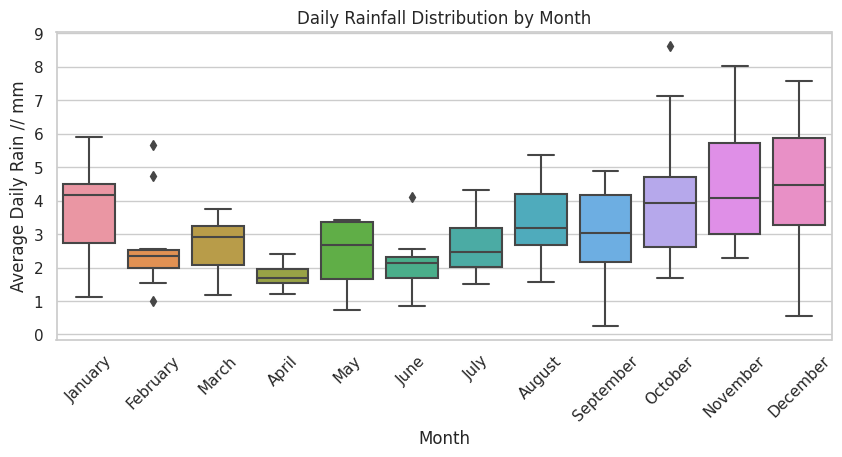

In [ ]:
avgpr = []
spread = pd.date_range(f'2006-01-01',f'2015-12-31', freq='M').strftime("%m/%Y").tolist()

for i in spread:
  avgpr.append((Comb_culzean.loc[Comb_culzean['timestamp'] == i, 'prcp_amt'].mean()))

ra = pd.DataFrame({'Rain':avgpr, 'spread':spread})
ra['spread'] = pd.to_datetime(ra['spread'])
ra['month'] = ra['spread'].dt.strftime('%B')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 4))
sns.boxplot(x='month', y='Rain', data=ra)
plt.xlabel('Month')
plt.ylabel('Average Daily Rain // mm')
plt.title('Daily Rainfall Distribution by Month')
plt.xticks(rotation=45)

#Modify y increment
y_increment = 1
y_min = 0
y_max = 9
plt.yticks(range(y_min, y_max + 1, y_increment))

plt.show()

          Solar     spread      month
0    602.976027 2005-07-01       July
1    613.125676 2005-08-01     August
2    391.575209 2005-09-01  September
3    167.690444 2005-10-01    October
4    121.900976 2005-11-01   November
..          ...        ...        ...
169  606.175000 2019-08-01     August
170  388.233333 2019-09-01  September
171  243.866935 2019-10-01    October
172  111.454167 2019-11-01   November
173   54.193548 2019-12-01   December

[174 rows x 3 columns]


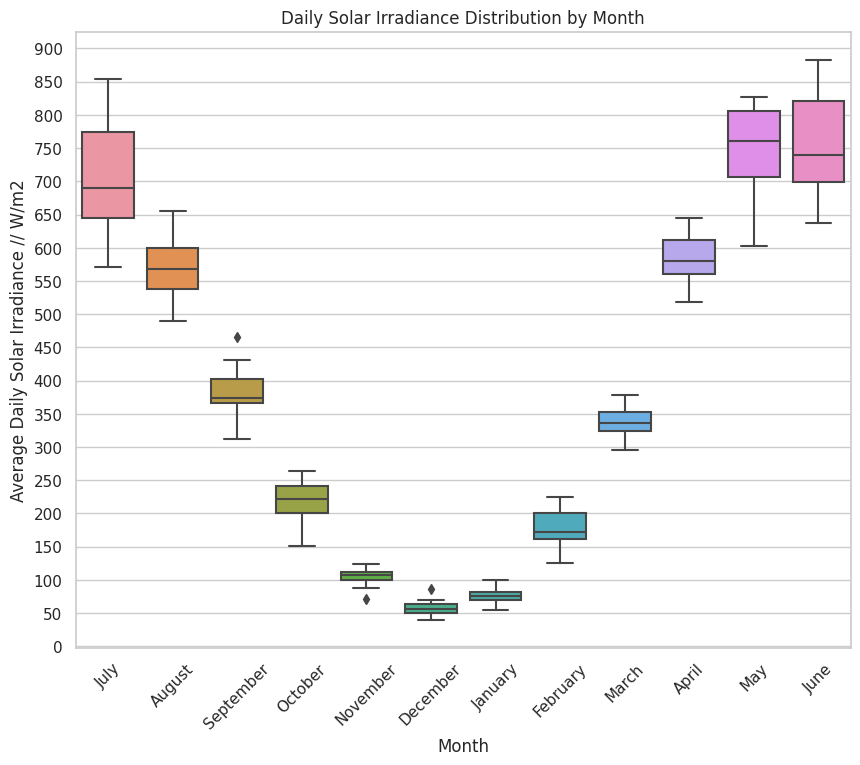

In [ ]:
avgq = []
spread = pd.date_range(f'2005-07-19',f'2019-12-31', freq='M').strftime("%m/%Y").tolist()

for i in spread:
  avgq.append((Comb_auchincruvie.loc[Comb_auchincruvie['timestamp'] == i, 'glbl_irad_amt'].mean()))

sr = pd.DataFrame({'Solar':avgq, 'spread':spread})
sr['spread'] = pd.to_datetime(sr['spread'])
sr['month'] = sr['spread'].dt.strftime('%B')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='month', y='Solar', data=sr)
plt.xlabel('Month')
plt.ylabel('Average Daily Solar Irradiance // W/m2')
plt.title('Daily Solar Irradiance Distribution by Month')
plt.xticks(rotation=45)

#Modify y increment
y_increment = 50
y_min = 0
y_max = 900
plt.yticks(range(y_min, y_max + 1, y_increment))

plt.show()

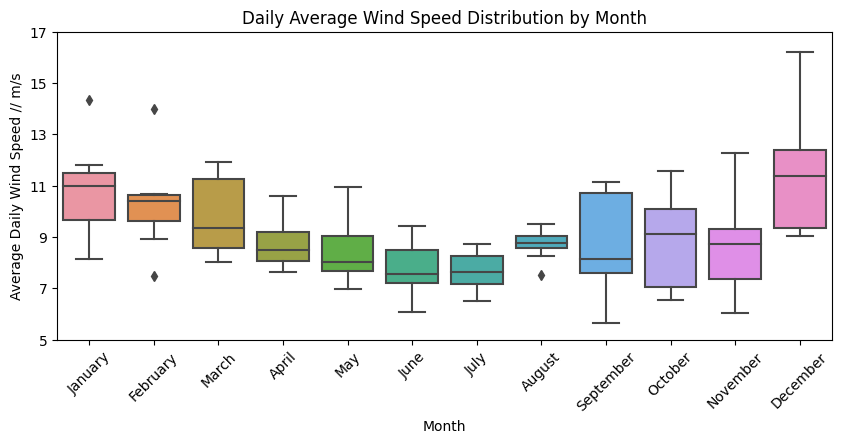

In [20]:
avgws = []
spread = pd.date_range(f'2012-01-01',f'2019-12-31', freq='M').strftime("%m/%Y").tolist()

for i in spread:
  avgws.append((Comb_pwick.loc[Comb_pwick['timestamp'] == i, 'mean_wind_speed'].mean()))

ws = pd.DataFrame({'Wind Speed':avgws, 'spread':spread})
ws['spread'] = pd.to_datetime(ws['spread'])
ws['month'] = ws['spread'].dt.strftime('%B')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 4))
sns.boxplot(x='month', y='Wind Speed', data=ws)
plt.xlabel('Month')
plt.ylabel('Average Daily Wind Speed // m/s')
plt.title('Daily Average Wind Speed Distribution by Month')
plt.xticks(rotation=45)

#Modify y increment
y_increment = 2
y_min = 5
y_max = 17
plt.yticks(range(y_min, y_max + 1, y_increment))

plt.show()